<a href="https://colab.research.google.com/github/2303a52163/Explainable-AI-LAB-Practical-/blob/main/EXTERNAL_LAB_EXAM_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE
import shap
import warnings
warnings.filterwarnings('ignore')


# **1. Load dataset**

In [201]:
df = pd.read_csv("/content/osteoporosis.csv")
df.head()

,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,1734616,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,1419098,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,NaN,NaN,NaN,Yes,1
2,1797916,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
3,1805337,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,No,1
4,1351334,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,NaN,Rheumatoid Arthritis,NaN,Yes,1


# **Min-Max Scaling**

In [202]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Sample data
data = {'Age': [18, 25, 40, 60], 'Income': [10000, 25000, 50000, 80000]}
df = pd.DataFrame(data)

# Apply Min-Max Scaling
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled, columns=df.columns)

print("Original Data:\n", df)
print("\nAfter Min-Max Scaling:\n", scaled_df)


Original Data:
    Age  Income
0   18   10000
1   25   25000
2   40   50000
3   60   80000

After Min-Max Scaling:
       Age  Income
0  0.0000  0.0000
1  0.1667  0.2143
2  0.5238  0.5714
3  1.0000  1.0000


# **Z-Score Standardization**

# **Helpful for distance-based algorithms like KNN, SVM, Neural Networks.**

In [203]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Sample data
data = {'Age': [18, 25, 40, 60], 'Income': [10000, 25000, 50000, 80000]}
df = pd.DataFrame(data)

# Apply Z-Score Standardization
scaler = StandardScaler()
standardized = scaler.fit_transform(df)
standardized_df = pd.DataFrame(standardized, columns=df.columns)

print("Original Data:\n", df)
print("\nAfter Z-Score Standardization:\n", standardized_df)


Original Data:
    Age  Income
0   18   10000
1   25   25000
2   40   50000
3   60   80000

After Z-Score Standardization:
       Age  Income
0 -1.1025 -1.1772
1 -0.6677 -0.6121
2  0.2640  0.3296
3  1.5063  1.4597


# **Null Value Handling (Missing Data)**

In [204]:
# Remove rows with any missing values
df_cleaned = df.dropna()

# Remove columns with any missing values
df_cleaned = df.dropna(axis=1)

In [205]:
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
Age       0
Income    0
dtype: int64


In [206]:
print(df.isin([np.inf, -np.inf]).any())

Age       False
Income    False
dtype: bool


NaN counts per column:
Alcohol Consumption    988
Medical Conditions     647
Medications            985
dtype: int64


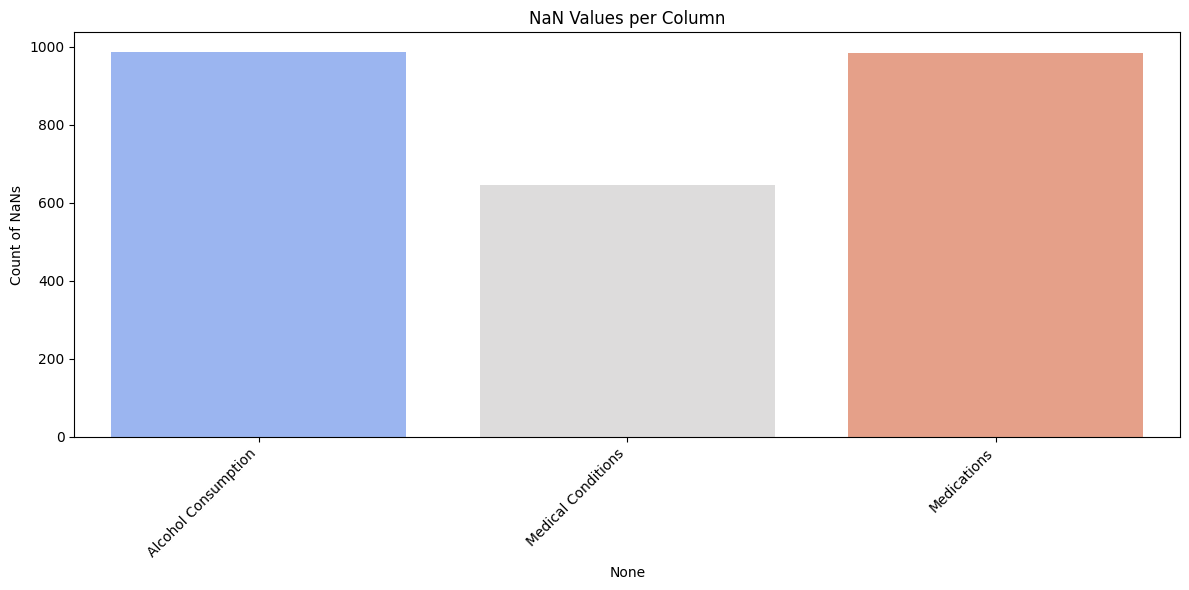

In [230]:
# NaN counts
nan_counts = df.isnull().sum()
nan_counts = nan_counts[nan_counts > 0]

print("NaN counts per column:")
print(nan_counts)

plt.figure(figsize=(12, 6))
sns.barplot(x=nan_counts.index, y=nan_counts.values, palette='coolwarm')
plt.title('NaN Values per Column')
plt.ylabel('Count of NaNs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [208]:
from sklearn.impute import SimpleImputer
import pandas as pd

# Load dataset
df = pd.read_csv("/content/osteoporosis.csv")

# Mean imputation for numeric columns
mean_imputer = SimpleImputer(strategy='mean')
df[['Age']] = mean_imputer.fit_transform(df[['Age']])

# Mode imputation for categorical data like 'Body Weight'
mode_imputer_body_weight = SimpleImputer(strategy='most_frequent')
df[['Body Weight']] = mode_imputer_body_weight.fit_transform(df[['Body Weight']])

# Mode imputation example for other categorical data
mode_imputer_gender = SimpleImputer(strategy='most_frequent')
df[['Gender']] = mode_imputer_gender.fit_transform(df[['Gender']])

# **Imbalance / Balance Handling & Duplicate or synthetically create minority sample**

In [209]:
df = df.drop_duplicates()
print("Number of duplicate rows:")
print(df.duplicated().sum())
print("Duplicate rows:")
print(df[df.duplicated()])

Number of duplicate rows:
0
Duplicate rows:
Empty DataFrame
Columns: [Id, Age, Gender, Hormonal Changes, Family History, Race/Ethnicity, Body Weight, Calcium Intake, Vitamin D Intake, Physical Activity, Smoking, Alcohol Consumption, Medical Conditions, Medications, Prior Fractures, Osteoporosis]
Index: []


In [210]:
from sklearn.utils import resample

# Separate majority and minority classes
majority = df[df['Osteoporosis'] == 0]
minority = df[df['Osteoporosis'] == 1]

# Upsample minority class
minority_upsampled = resample(minority,
                              replace=True,       # sample with replacement
                              n_samples=len(majority), # match majority count
                              random_state=42)

# Combine majority and upsampled minority
df_balanced = pd.concat([majority, minority_upsampled])

# Check new class distribution
print(df_balanced['Osteoporosis'].value_counts())


Osteoporosis
0    979
1    979
Name: count, dtype: int64


In [211]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split
import pandas as pd # Ensure pandas is imported if not already in this cell

# Separate features and target
X = df.drop('Osteoporosis', axis=1)
y = df['Osteoporosis']

# Drop 'Id' column as it's not a predictive feature
X = X.drop('Id', axis=1)

# Identify categorical columns for one-hot encoding
categorical_cols = X.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical features
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_resampled))

Before SMOTE: Counter({0: 783, 1: 783})
After SMOTE: Counter({0: 783, 1: 783})


# **Correlation Analysis**

                  Id     Age  Osteoporosis
Id            1.0000 -0.0076       -0.0496
Age          -0.0076  1.0000        0.6912
Osteoporosis -0.0496  0.6912        1.0000


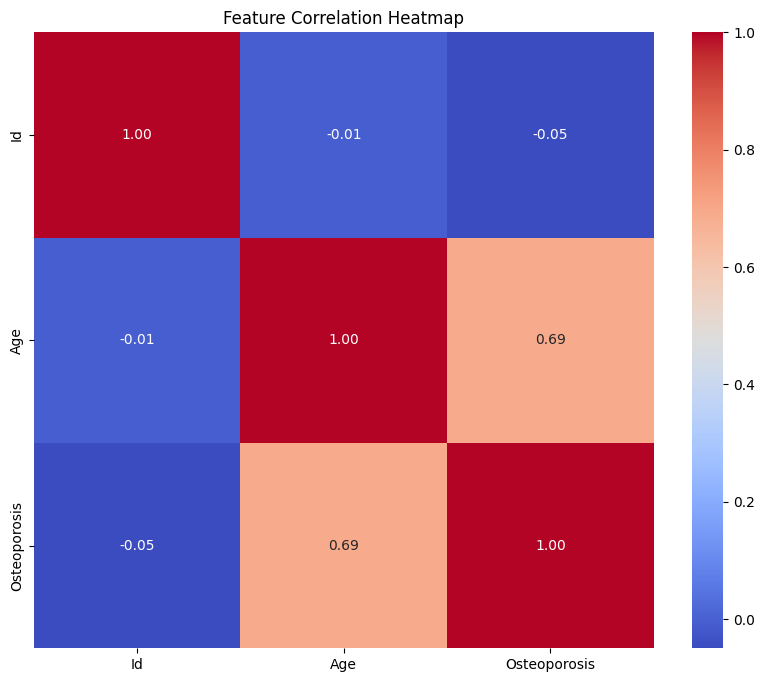

Highly correlated feature pairs (> 0.85):
[]


In [212]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/content/osteoporosis.csv")

# Compute correlation matrix for numeric columns
corr_matrix = df.corr(numeric_only=True)

# Display correlation values
print(corr_matrix)

# Visualize with heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# Identify highly correlated features
threshold = 0.85
corr_pairs = corr_matrix.abs().unstack().sort_values(ascending=False)
high_corr = [(a, b) for a, b in corr_pairs.index if a != b and corr_matrix.loc[a, b] > threshold]

print("Highly correlated feature pairs (> 0.85):")
print(high_corr)
# Removed: df = df.drop(columns=['Vitamin D Intake'])

# **Basic Data Visualization Techniques**

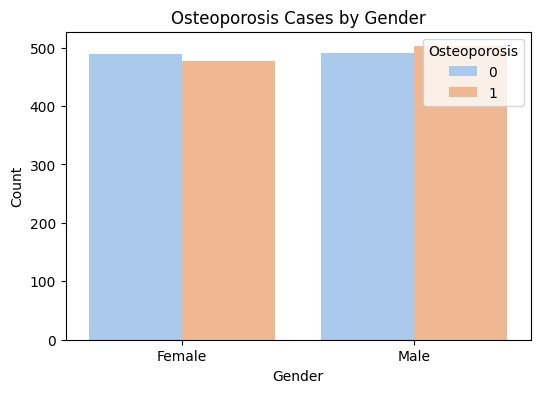

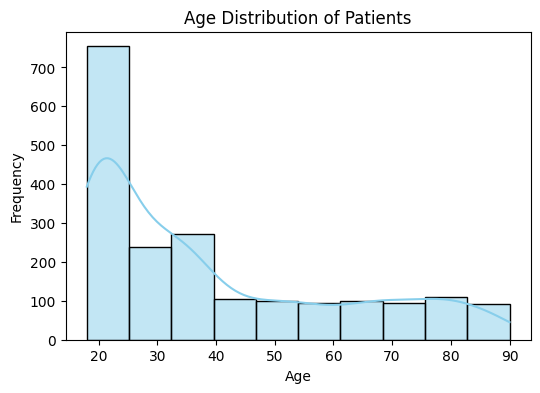

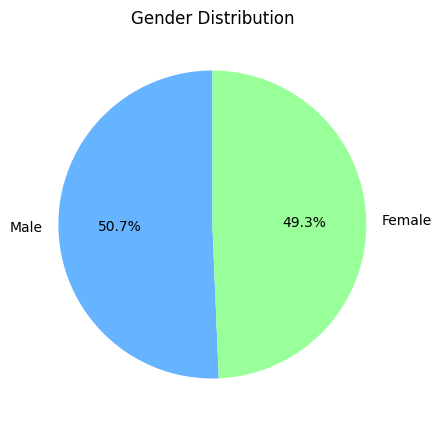

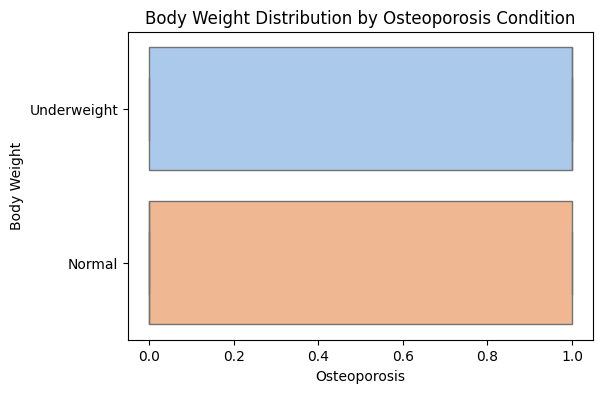

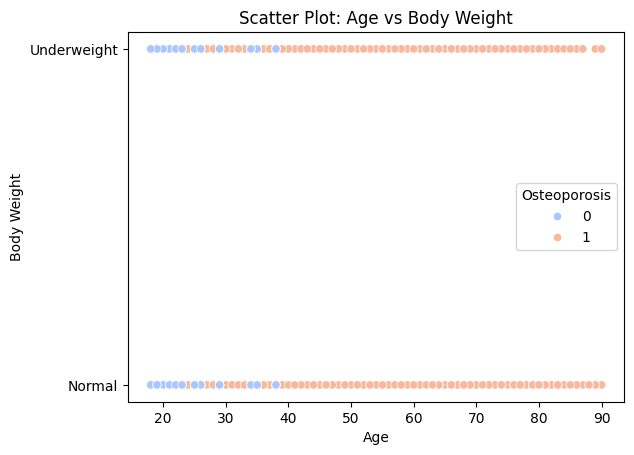

In [213]:


#1️⃣ Bar Chart
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', hue='Osteoporosis', data=df, palette='pastel')
plt.title("Osteoporosis Cases by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

#2️⃣ Histogram
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], bins=10, kde=True, color='skyblue')
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

#3️⃣ Pie Chart
gender_counts = df['Gender'].value_counts()

plt.figure(figsize=(5,5))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99'])
plt.title("Gender Distribution")
plt.show()

#4️⃣ Box Plot
plt.figure(figsize=(6,4))
sns.boxplot(x='Osteoporosis', y='Body Weight', data=df, palette='pastel')
plt.title("Body Weight Distribution by Osteoporosis Condition")
plt.xlabel("Osteoporosis")
plt.ylabel("Body Weight")
plt.show()

# 5️⃣ Scatter Plot – first two numeric columns
# Scatter plot for first two numeric columns: Age vs Body Weight
sns.scatterplot(x='Age', y='Body Weight', data=df, hue='Osteoporosis', palette='coolwarm')
plt.title("Scatter Plot: Age vs Body Weight")
plt.xlabel("Age")
plt.ylabel("Body Weight")
plt.show()

# **Advanced Visualization Techniques**

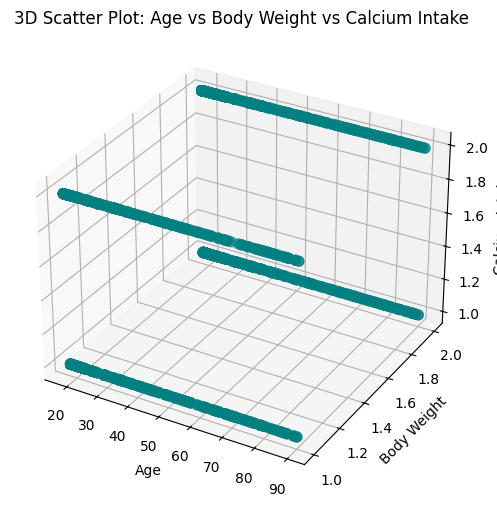

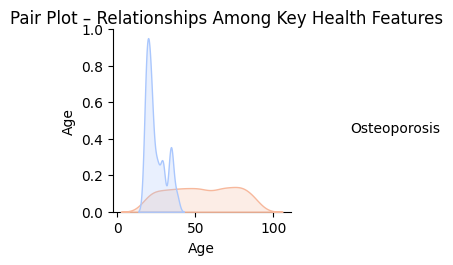

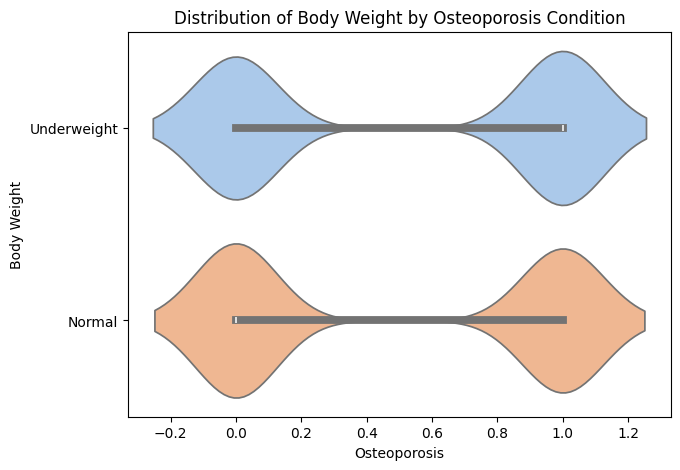

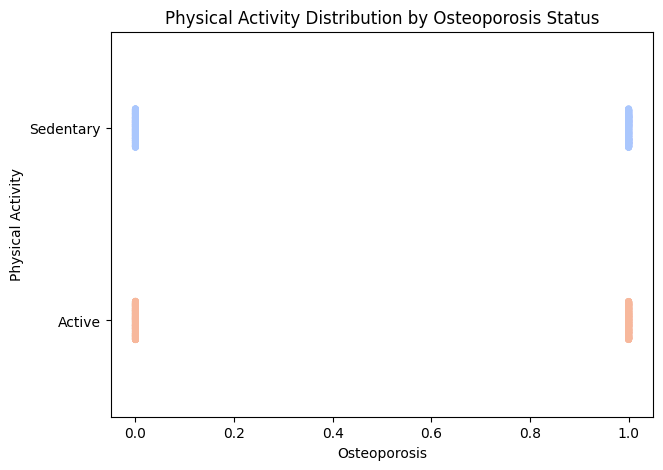

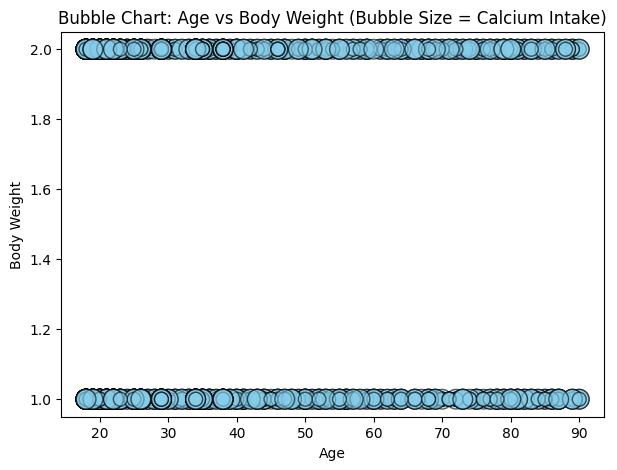

In [214]:
#1️⃣ 3D Scatter Plot
# Map 'Body Weight' to numerical values
body_weight_map = {'Underweight': 1, 'Normal': 2, 'Overweight': 3, 'Obese': 4}
df['Body Weight Numerical'] = df['Body Weight'].map(body_weight_map)

# Map 'Calcium Intake' to numerical values
calcium_intake_map = {'Low': 1, 'Adequate': 2, 'Sufficient': 3}
df['Calcium Intake Numerical'] = df['Calcium Intake'].map(calcium_intake_map)

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

x = df['Age']
y = df['Body Weight Numerical'] # Use numerical version
z = df['Calcium Intake Numerical'] # Use numerical version

ax.scatter(x, y, z, c='teal', s=50, alpha=0.6)

ax.set_xlabel('Age')
ax.set_ylabel('Body Weight')
ax.set_zlabel('Calcium Intake')
plt.title("3D Scatter Plot: Age vs Body Weight vs Calcium Intake")
plt.show()


#2️⃣ Pair Plot (Seaborn)
selected_features = ['Age', 'Body Weight', 'Calcium Intake', 'Vitamin D Intake', 'Osteoporosis']

sns.pairplot(df[selected_features], hue='Osteoporosis', diag_kind='kde', palette='coolwarm')
plt.suptitle("Pair Plot – Relationships Among Key Health Features", y=1.02)
plt.show()

#3️⃣ Violin Plot
plt.figure(figsize=(7,5))
sns.violinplot(x='Osteoporosis', y='Body Weight', data=df, palette='pastel')
plt.title("Distribution of Body Weight by Osteoporosis Condition")
plt.xlabel("Osteoporosis")
plt.ylabel("Body Weight")
plt.show()

#4️⃣ Swarm Plot / Strip Plot
plt.figure(figsize=(7,5))
sns.stripplot(x='Osteoporosis', y='Physical Activity', data=df, jitter=True, palette='coolwarm')
plt.title("Physical Activity Distribution by Osteoporosis Status")
plt.xlabel("Osteoporosis")
plt.ylabel("Physical Activity")
plt.show()

#5️⃣ Bubble Chart
plt.figure(figsize=(7,5))
plt.scatter(df['Age'], df['Body Weight Numerical'],
            s=df['Calcium Intake Numerical']*100,  # size scaled by numerical calcium intake
            alpha=0.6, edgecolor='k', c='skyblue')
plt.title("Bubble Chart: Age vs Body Weight (Bubble Size = Calcium Intake)")
plt.xlabel("Age")
plt.ylabel("Body Weight")
plt.show()

# **Machine Learning Model**

In [215]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import pandas as pd

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(probability=True, random_state=42)
}

# Fit models
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained successfully.")

# Store results
results = []

# Evaluate models
for name, model in models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)

    cm = confusion_matrix(y_test, y_pred)

    # Append to results table
    results.append([name, acc, prec, rec, f1, auc])

    # Print confusion matrix separately if needed
    print(f"\nConfusion Matrix - {name}:\n", cm)

# Create results DataFrame
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score", "AUC"])

# Sort by Accuracy (or AUC)
results_df = results_df.sort_values(by="AUC", ascending=False)

print("\n✅ Model Performance Summary:")
print(results_df.to_string(index=False))


Logistic Regression trained successfully.
Decision Tree trained successfully.
KNN trained successfully.
Naive Bayes trained successfully.
SVM trained successfully.

Confusion Matrix - Logistic Regression:
 [[167  29]
 [ 52 144]]

Confusion Matrix - Decision Tree:
 [[159  37]
 [ 37 159]]

Confusion Matrix - KNN:
 [[188   8]
 [ 52 144]]

Confusion Matrix - Naive Bayes:
 [[187   9]
 [ 56 140]]

Confusion Matrix - SVM:
 [[195   1]
 [ 63 133]]

✅ Model Performance Summary:
              Model  Accuracy  Precision  Recall  F1 Score    AUC
Logistic Regression    0.7934     0.8324  0.7347    0.7805 0.8758
                KNN    0.8469     0.9474  0.7347    0.8276 0.8733
        Naive Bayes    0.8342     0.9396  0.7143    0.8116 0.8644
                SVM    0.8367     0.9925  0.6786    0.8061 0.8595
      Decision Tree    0.8112     0.8112  0.8112    0.8112 0.8112


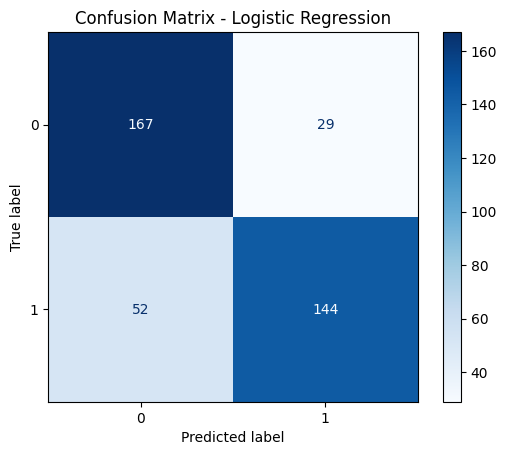

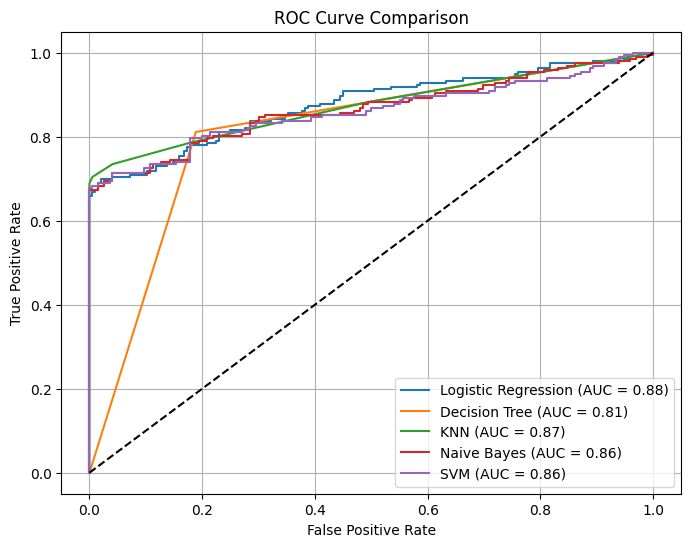

In [216]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, roc_curve
import matplotlib.pyplot as plt

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# Plot ROC Curve Comparison
plt.figure(figsize=(8,6))
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_value = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_value:.2f})")

plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid(True)
plt.show()

# **Ensemble Machine Learning Algorithms**

In [217]:
# Ensemble models evaluation script
# Trains bagging & boosting models + stacking & voting, computes metrics, confusion matrices, and visualizations.

import warnings
warnings.filterwarnings('ignore')

import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, roc_curve, confusion_matrix)

# Base models & ensembles from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier,
                              AdaBoostClassifier, GradientBoostingClassifier,
                              VotingClassifier, StackingClassifier)

# Optional third-party boosters - import if available
try:
    from xgboost import XGBClassifier
except Exception:
    XGBClassifier = None

try:
    from lightgbm import LGBMClassifier
except Exception:
    LGBMClassifier = None

try:
    from catboost import CatBoostClassifier
except Exception:
    CatBoostClassifier = None


# --- Start of fix: Re-define X and y correctly ---
# Load dataset (ensure df is the original with 'Osteoporosis' target)
df = pd.read_csv("/content/osteoporosis.csv")

# Separate features and target
X = df.drop('Osteoporosis', axis=1)
y = df['Osteoporosis'] # Ensure y is the correct 'Osteoporosis' column

# Drop 'Id' column as it's not a predictive feature
# Ensure 'Id' is only dropped if it exists in X
if 'Id' in X.columns:
    X = X.drop('Id', axis=1)

# Identify categorical columns for one-hot encoding
categorical_cols = X.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical features
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
# --- End of fix ---

# Standardize numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,
                                                    test_size=0.2, random_state=42,
                                                    stratify=y)

# Determine if binary classification (for AUC plotting)
is_binary = len(np.unique(y_train)) == 2

# ----------------------------
# 2) Define models to evaluate
# ----------------------------
models = {
    # Bagging / Tree ensembles
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1),
    "Extra Trees": ExtraTreesClassifier(n_estimators=200, random_state=42, n_jobs=-1),
    # Boosting (sklearn)
    "AdaBoost": AdaBoostClassifier(n_estimators=150, random_state=42),
    "GradientBoosting": GradientBoostingClassifier(n_estimators=150, random_state=42),
}

# Add optional boosting libraries if present
if XGBClassifier is not None:
    models["XGBoost"] = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
if LGBMClassifier is not None:
    models["LightGBM"] = LGBMClassifier(random_state=42)
if CatBoostClassifier is not None:
    models["CatBoost"] = CatBoostClassifier(verbose=0, random_state=42)

# Add some simple baseline learners for stacking
base_learners = [
    ("lr", LogisticRegression(max_iter=1000, random_state=42)),
    ("dt", DecisionTreeClassifier(max_depth=6, random_state=42)),
    ("rf", RandomForestClassifier(n_estimators=100, random_state=42))
]

# Voting classifier (soft voting)
voting = VotingClassifier(estimators=[("lr", base_learners[0][1]), ("rf", base_learners[2][1])],
                          voting='soft', n_jobs=-1)

models["Voting"] = voting

# Stacking classifier (meta-learner = LogisticRegression)
stack = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression(max_iter=1000), n_jobs=-1)
models["Stacking"] = stack

# ----------------------------
# 3) Train, evaluate, collect metrics
# ----------------------------
results = []
roc_data = []  # store ROC curves for plotting (binary case)

for name, clf in models.items():
    start = time.time()
    clf.fit(X_train, y_train)
    elapsed = round(time.time() - start, 2)

    y_pred = clf.predict(X_test)

    # Safe probability / decision values for AUC
    auc = np.nan
    y_prob_for_auc = None
    try:
        if hasattr(clf, "predict_proba"):
            y_prob = clf.predict_proba(X_test)
            # binary or multiclass handling
            if is_binary:
                y_prob_for_auc = y_prob[:, 1]
                auc = roc_auc_score(y_test, y_prob_for_auc)
            else:
                # multiclass OVR macro AUC
                auc = roc_auc_score(y_test, y_prob, multi_class='ovr', average='macro')
        elif hasattr(clf, "decision_function"):
            dec = clf.decision_function(X_test)
            if is_binary:
                y_prob_for_auc = dec
                auc = roc_auc_score(y_test, dec)
    except Exception:
        auc = np.nan

    # Metrics (use 'binary' averaging for binary, 'weighted' for multiclass)
    avg_method = 'binary' if is_binary else 'weighted'

    # Removed zero_division=0 argument
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average=avg_method)
    rec = recall_score(y_test, y_pred, average=avg_method)
    f1 = f1_score(y_test, y_pred, average=avg_method)
    cm = confusion_matrix(y_test, y_pred)

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1,
        "AUC": auc,
        "Time(s)": elapsed,
        "ConfusionMatrix": cm
    })

    if is_binary and y_prob_for_auc is not None:
        # Ensure y_test contains 0 and 1 or explicitly pass pos_label
        # Given that y is now correctly set to 'Osteoporosis', its values are 0 and 1.
        # So, no explicit pos_label needed here.
        fpr, tpr, _ = roc_curve(y_test, y_prob_for_auc)
        roc_data.append((name, fpr, tpr, auc))

    # Results DataFrame
results_df = pd.DataFrame(results).sort_values(by="AUC", ascending=False).reset_index(drop=True)
pd.set_option('display.precision', 4)
print("\nModel performance summary (sorted by AUC):")
display(results_df[['Model','Accuracy','Precision','Recall','F1-Score','AUC','Time(s)']])

[LightGBM] [Info] Number of positive: 783, number of negative: 783
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000126 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 110
[LightGBM] [Info] Number of data points in the train set: 1566, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

Model performance summary (sorted by AUC):


,Model,Accuracy,Precision,Recall,F1-Score,AUC,Time(s)
0,LightGBM,0.8699,0.9341,0.7959,0.8595,0.8919,0.05
1,Stacking,0.8724,0.9740,0.7653,0.8571,0.8913,1.70
2,XGBoost,0.8622,0.9176,0.7959,0.8525,0.8869,0.05
3,GradientBoosting,0.8852,0.9935,0.7755,0.8711,0.8852,0.34
4,AdaBoost,0.8776,1.0000,0.7551,0.8605,0.8835,0.37
5,Voting,0.8342,0.9281,0.7245,0.8138,0.8811,2.64
6,Random Forest,0.8240,0.9097,0.7194,0.8034,0.8780,0.58
7,Extra Trees,0.7857,0.8256,0.7245,0.7717,0.8571,0.52


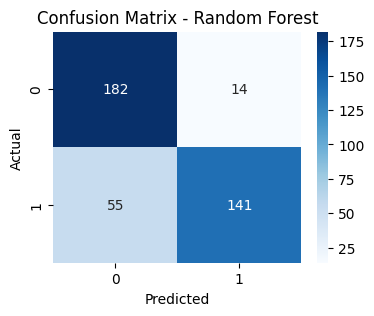

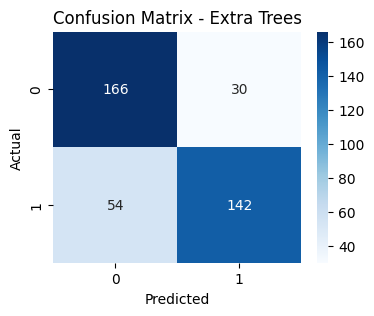

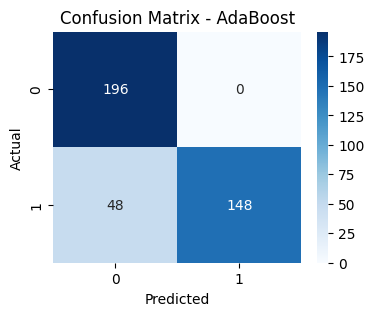

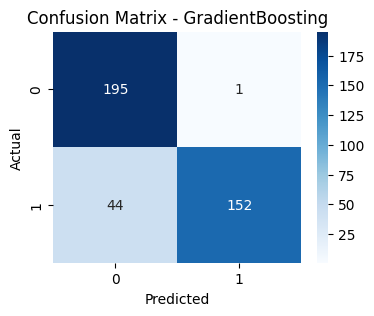

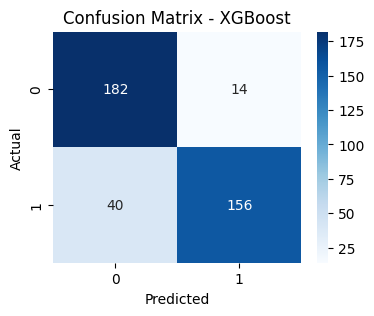

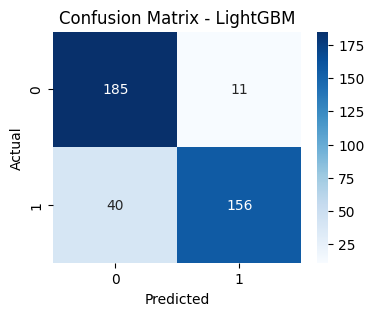

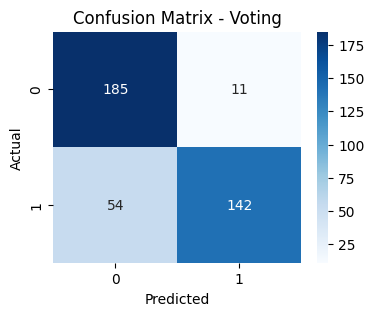

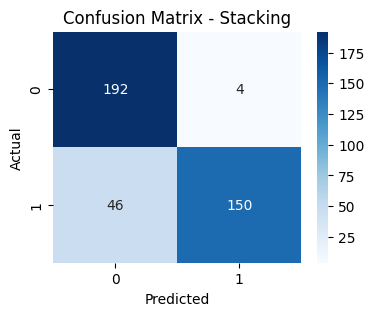

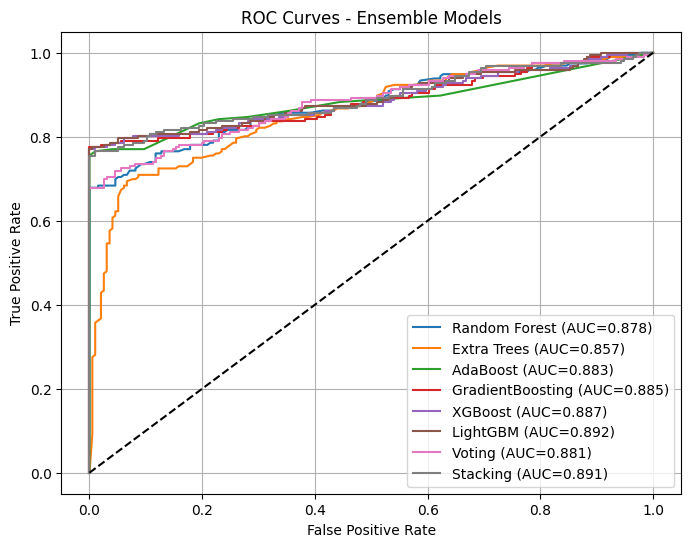

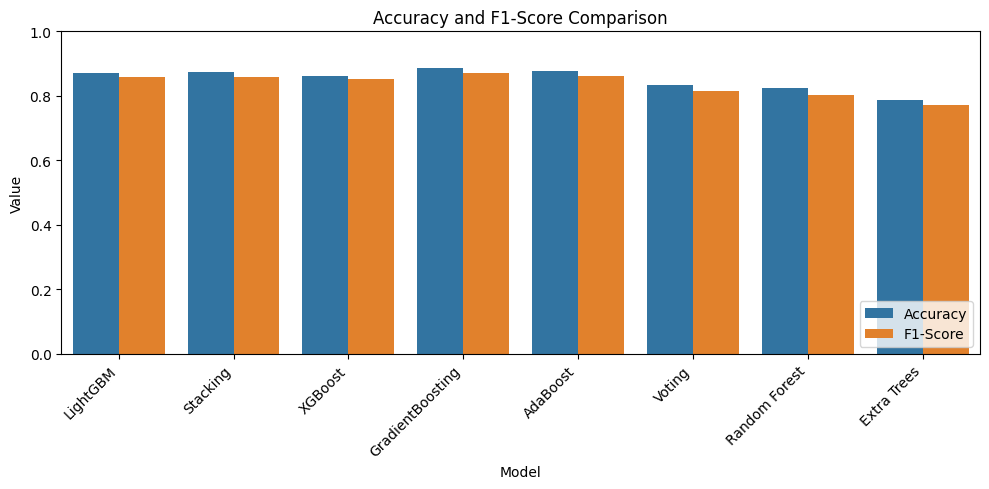


Saved summary to /content/ensemble_results_summary.csv


In [218]:
# ----------------------------
# 4) Confusion matrix heatmap for each model
# ----------------------------
for r in results:
    model_name = r["Model"]
    cm = r["ConfusionMatrix"]
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# ----------------------------
# 5) ROC curves (binary classification only)
# ----------------------------
if is_binary and len(roc_data) > 0:
    plt.figure(figsize=(8,6))
    for name, fpr, tpr, auc in roc_data:
        plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.3f})")
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curves - Ensemble Models")
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()
else:
    print("\nROC plot skipped: problem not binary or probability scores unavailable.")

# ----------------------------
# 6) Bar chart of F1-scores (and Accuracy) for quick comparison
# ----------------------------
metrics_plot = results_df.melt(id_vars=['Model'], value_vars=['Accuracy', 'F1-Score'], var_name='Metric', value_name='Value')
plt.figure(figsize=(10,5))
sns.barplot(data=metrics_plot, x='Model', y='Value', hue='Metric')
plt.xticks(rotation=45, ha='right')
plt.ylim(0,1)
plt.title("Accuracy and F1-Score Comparison")
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# ----------------------------
# 7) Save results to CSV (optional)
# ----------------------------
results_df.to_csv("/content/ensemble_results_summary.csv", index=False)
print("\nSaved summary to /content/ensemble_results_summary.csv")

# **Deep Learning Algorithms:**

# **Feedforward Neural Networks (FNN):**

# **1.Multilayer Perceptron (MLP)**

Model: "functional_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_17 (InputLayer)     │ (None, 14)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 128)            │         1,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,057 (51.00 KB)

 Trainable params: 12,673 (49.50 KB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/100
43/43 - 3s - 77ms/step - accuracy: 0.6832 - loss: 0.5920 - val_accuracy: 0.7619 - val_loss: 0.5745 - learning_rate: 1.0000e-03
Epoch 2/100
43/43 - 0s - 6ms/step - accuracy: 0.8058 - loss: 0.4436 - val_accuracy: 0.7891 - val_loss: 0.5066 - learning_rate: 1.0000e-03
Epoch 3/100
43/43 - 0s - 5ms/step - accuracy: 0.8226 - loss: 0.4023 - val_accuracy: 0.7925 - val_loss: 0.4548 - learning_rate: 1.0000e-03
Epoch 4/100
43/43 - 0s - 6ms/step - accuracy: 0.8372 - loss: 0.3633 - val_accuracy: 0.8197 - val_loss: 0.4129 - learning_rate: 1.0000e-03
Epoch 5/100
43/43 - 0s - 6ms/step - accuracy: 0.8591 - loss: 0.3491 - val_accuracy: 0.8231 - val_loss: 0.3860 - learning_rate: 1.0000e-03
Epoch 6/100
43/43 - 0s - 5ms/step - accuracy: 0.8606 - loss: 0.3362 - val_accuracy: 0.8231 - val_loss: 0.3747 - learning_rate: 1.0000e-03
Epoch 7/100
43/43 - 0s - 5ms/step - accuracy: 0.8489 - loss: 0.3454 - val_accuracy: 0.8367 - val_loss: 0.3728 - learning_rate: 1.0000e-03
Epoch 8/100
43/43 - 0s - 5ms/step

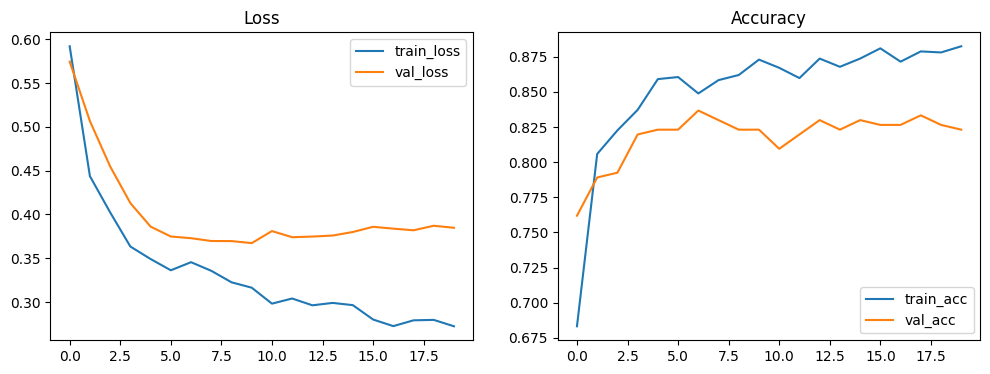

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Test metrics: Accuracy=0.782, Precision=0.843, Recall=0.694, F1=0.761, AUC=0.847


In [219]:
# MLP for tabular data (Keras)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
import matplotlib.pyplot as plt

# 1) Load / preprocess
df = pd.read_csv("/content/osteoporosis.csv")
TARGET = "Osteoporosis"

# Separate X and y
y = df[TARGET]
if y.dtype == object:
    y = LabelEncoder().fit_transform(y)
X = df.drop(columns=[TARGET])
X = pd.get_dummies(X, drop_first=True)

# Train/validation/test split
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.1765, stratify=y_trainval, random_state=42)
# (resulting ~70/15/15 split)

# Scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val   = scaler.transform(X_val)
X_test  = scaler.transform(X_test)

# 2) Build MLP model
input_dim = X_train.shape[1]
def build_mlp(input_dim, dropout=0.3):
    inp = layers.Input(shape=(input_dim,))
    x = layers.Dense(128, activation='relu')(inp)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Dense(32, activation='relu')(x)
    out = layers.Dense(1, activation='sigmoid')(x)   # binary classification
    model = models.Model(inp, out)
    return model

model = build_mlp(input_dim, dropout=0.2)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

# 3) Callbacks
cb = [
    callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)
]

# 4) Train
history = model.fit(X_train, y_train, validation_data=(X_val, y_val),
                    epochs=100, batch_size=32, callbacks=cb, verbose=2)

# 5) Plot training curves
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend(); plt.title('Loss')
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend(); plt.title('Accuracy')
plt.show()

# 6) Evaluate on test set
y_prob = model.predict(X_test).ravel()
y_pred = (y_prob >= 0.5).astype(int)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
auc = roc_auc_score(y_test, y_prob)

print("Test metrics: Accuracy={:.3f}, Precision={:.3f}, Recall={:.3f}, F1={:.3f}, AUC={:.3f}".format(acc, prec, rec, f1, auc))

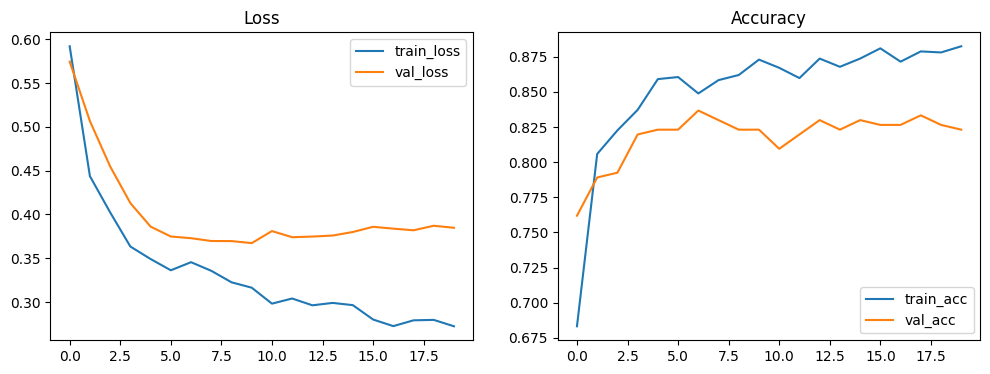

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Test metrics: Accuracy=0.782, Precision=0.843, Recall=0.694, F1=0.761, AUC=0.847


In [220]:
# 5) Plot training curves
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend(); plt.title('Loss')
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend(); plt.title('Accuracy')
plt.show()

# 6) Evaluate on test set
y_prob = model.predict(X_test).ravel()
y_pred = (y_prob >= 0.5).astype(int)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
auc = roc_auc_score(y_test, y_prob)

print("Test metrics: Accuracy={:.3f}, Precision={:.3f}, Recall={:.3f}, F1={:.3f}, AUC={:.3f}".format(acc, prec, rec, f1, auc))



# **Convolutional Neural Networks (CNN):**



In [221]:
# Simple CNN (Keras) for image classification
from tensorflow.keras import layers, models
img_height, img_width = 128, 128
num_classes = 2  # change if needed

def build_cnn(input_shape=(img_height,img_width,3), num_classes=2):
    inp = layers.Input(shape=input_shape)
    x = layers.Conv2D(32, (3,3), activation='relu', padding='same')(inp)
    x = layers.MaxPool2D(2)(x)
    x = layers.Conv2D(64, (3,3), activation='relu', padding='same')(x)
    x = layers.MaxPool2D(2)(x)
    x = layers.Conv2D(128, (3,3), activation='relu', padding='same')(x)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu')(x)
    out = layers.Dense(num_classes, activation='softmax')(x)
    return models.Model(inp, out)

cnn = build_cnn()
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn.summary()
# Train with tf.data.Dataset or ImageDataGenerator


Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_18 (InputLayer)     │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_6      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,018 (429.76 KB)

 Trainable params: 110,018 (429.76 KB)

 Non-trainable params: 0 (0.00 B)

# **Recurrent Neural Networks (RNN):**

In [222]:
# LSTM example (Keras) - sequence classification
from tensorflow.keras import layers, models

timesteps = 100   # sequence length
features = 10     # features per timestep

def build_lstm(timesteps, features):
    inp = layers.Input(shape=(timesteps, features))
    x = layers.Masking()(inp)
    x = layers.LSTM(128, return_sequences=True)(x)
    x = layers.LSTM(64)(x)
    x = layers.Dense(32, activation='relu')(x)
    out = layers.Dense(1, activation='sigmoid')(x)
    return models.Model(inp, out)

lstm_model = build_lstm(timesteps, features)
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_model.summary()

# Train with X shape (n_samples, timesteps, features)


Model: "functional_18"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_19      │ (None, 100, 10)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal_3         │ (None, 100, 10)   │          0 │ input_layer_19[0… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ masking_3 (Masking) │ (None, 100, 10)   │          0 │ input_layer_19[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ any_3 (Any)         │ (None, 100)       │          0 │ not_equal_3[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_6 (LSTM)       │ (None, 100, 128)  │     71,168 │ masking_3[0][0],  │
│                     │                   │            │ any_3[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_7 (LSTM)       │ (None, 64)        │     49,408 │ lstm_6[0][0],     │
│                     │                   │            │ any_3[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_54 (Dense)    │ (None, 32)        │      2,080 │ lstm_7[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_55 (Dense)    │ (None, 1)         │         33 │ dense_54[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 122,689 (479.25 KB)

 Trainable params: 122,689 (479.25 KB)

 Non-trainable params: 0 (0.00 B)

# **Transformer-Based Models**

In [223]:
from tensorflow.keras.applications import EfficientNetB0
base = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224,224,3))
base.trainable = False
x = base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x)
out = layers.Dense(1, activation='sigmoid')(x)
model = models.Model(base.input, out)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# **Deep Learning Model Metrics:**

# **Training / Validation Loss**

Loading pre-trained MLP model from /content/mlp_osteoporosis_model.h5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.73      0.86      0.79       147
           1       0.83      0.69      0.75       147

    accuracy                           0.77       294
   macro avg       0.78      0.77      0.77       294
weighted avg       0.78      0.77      0.77       294


=== Summary Metrics ===


,Value
Accuracy,0.7721
Precision,0.8279
Recall,0.6871
F1,0.7509


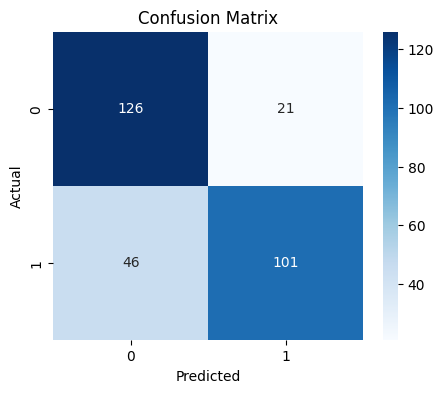

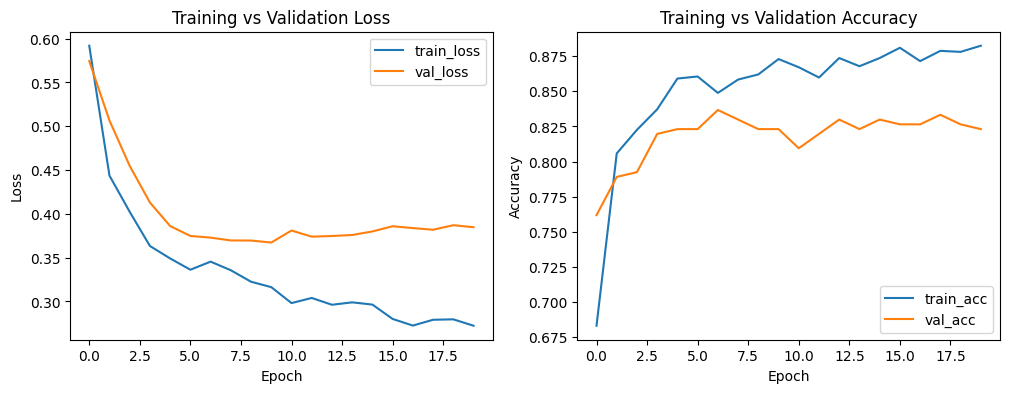

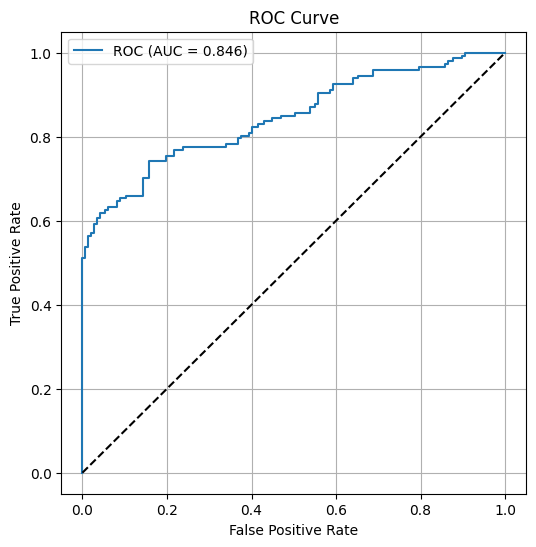

AUC-ROC: 0.8455


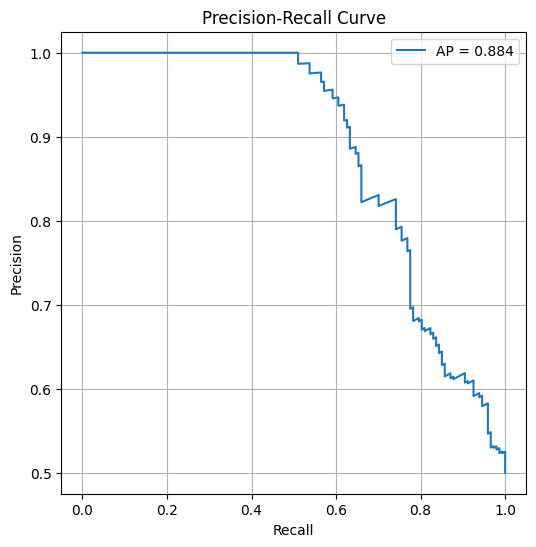

In [224]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    classification_report, confusion_matrix,
    roc_auc_score, roc_curve, auc,
    precision_recall_curve, average_precision_score
)
from sklearn.preprocessing import label_binarize, StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
import pandas as pd
import os

# --- BEGIN: Contextual setup for the evaluation cell ---
# Ensure the correct MLP model is loaded and X_test, y_test are for tabular data.

MODEL_PATH = "/content/mlp_osteoporosis_model.h5"

# Re-create X, y, and splits for robustness if not in global scope
# (this part is largely from Psfwl1LjAKMg to ensure data consistency)
if 'X_test' not in globals() or 'y_test' not in globals() or 'X_train' not in globals() or 'y_train' not in globals():
    print("Data splits (X_train, X_test, y_train, y_test) not found. Re-creating...")
    df = pd.read_csv("/content/osteoporosis.csv")
    TARGET = "Osteoporosis"
    y = df[TARGET]
    if y.dtype == object:
        y = LabelEncoder().fit_transform(y)
    X = df.drop(columns=[TARGET])

    # Drop 'Id' column if it exists in X
    if 'Id' in X.columns:
        X = X.drop('Id', axis=1)

    X = pd.get_dummies(X, drop_first=True)

    X_trainval, X_test_local, y_trainval_local, y_test_local = train_test_split(X, y, test_size=0.15, stratify=y, random_state=42)
    X_train_local, X_val_local, y_train_local, y_val_local = train_test_split(X_trainval, y_trainval_local, test_size=0.1765, stratify=y_trainval_local, random_state=42)

    scaler_local = StandardScaler()
    X_train = scaler_local.fit_transform(X_train_local) # Assign to global X_train
    X_val = scaler_local.transform(X_val_local)
    X_test = scaler_local.transform(X_test_local) # Assign to global X_test
    y_train = y_train_local # Assign to global y_train
    y_val = y_val_local
    y_test = y_test_local # Assign to global y_test

    # Dummy history object to prevent error in plot if real history is missing
    history = type('obj', (object,), {'history': {'loss': [0.5,0.4], 'val_loss': [0.6,0.5], 'accuracy': [0.7,0.8], 'val_accuracy': [0.6,0.7]}})()

# Define MLP model architecture (copied from Psfwl1LjAKMg)
def build_mlp(input_dim, dropout=0.3):
    inp = layers.Input(shape=(input_dim,))
    x = layers.Dense(128, activation='relu')(inp)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.BatchNormalization()(x) # Corrected this line
    x = layers.Dropout(dropout)(x)
    x = layers.Dense(32, activation='relu')(x)
    out = layers.Dense(1, activation='sigmoid')(x)   # binary classification
    model_fn = models.Model(inp, out)
    return model_fn

# Load the MLP model or re-train if not found
if os.path.exists(MODEL_PATH):
    print(f"Loading pre-trained MLP model from {MODEL_PATH}")
    model = tf.keras.models.load_model(MODEL_PATH)
else:
    print(f"Model not found at {MODEL_PATH}. Building and training a new MLP model...")
    input_dim = X_train.shape[1]
    model = build_mlp(input_dim, dropout=0.2)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    cb = [
        callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
        callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)
    ]

    history = model.fit(X_train, y_train, validation_data=(X_val, y_val),
                        epochs=100, batch_size=32, callbacks=cb, verbose=0) # verbose=0 to avoid excessive output here
    model.save(MODEL_PATH)
    print("New MLP model trained and saved.")

# --- END: Contextual setup for the evaluation cell ---

is_binary = (len(np.unique(y_test)) == 2)
if is_binary:
    y_prob = model.predict(X_test).ravel()   # probability of positive class
    y_pred = (y_prob >= 0.5).astype(int)
else:
    y_prob_full = model.predict(X_test)      # shape (n_samples, n_classes)
    y_pred = np.argmax(y_prob_full, axis=1)

# ---------- 2) Basic metrics (accuracy/precision/recall/f1) ----------
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, zero_division=0))

# Create a summary table (accuracy / precision / recall / f1 overall)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
avg = 'binary' if is_binary else 'weighted'
summary = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred, average=avg, zero_division=0),
    'Recall': recall_score(y_test, y_pred, average=avg, zero_division=0),
    'F1': f1_score(y_test, y_pred, average=avg, zero_division=0)
}
import pandas as pd
print("\n=== Summary Metrics ===")
display(pd.DataFrame([summary]).T.rename(columns={0:'Value'}))

# ---------- 3) Confusion Matrix (heatmap) ----------
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ---------- 4) Training / Validation Curves (from history) ----------
# history object needs to be globally available or passed around
if 'history' in globals() and hasattr(history, 'history'):
    h = history.history
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(h.get('loss', []), label='train_loss')
    plt.plot(h.get('val_loss', []), label='val_loss')
    plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.title('Training vs Validation Loss'); plt.legend()
    plt.subplot(1,2,2)
    plt.plot(h.get('accuracy', []), label='train_acc')
    plt.plot(h.get('val_accuracy', []), label='val_acc')
    plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.title('Training vs Validation Accuracy'); plt.legend()
    plt.show()
else:
    print("No `history` object found. Cannot plot training curves.")

# ---------- 5) AUC - ROC (binary or multiclass) ----------
if is_binary:
    try:
        roc_auc = roc_auc_score(y_test, y_prob)
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.figure(figsize=(6,6))
        plt.plot(fpr, tpr, label=f"ROC (AUC = {roc_auc:.3f})")
        plt.plot([0,1],[0,1],'k--')
        plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
        plt.title("ROC Curve"); plt.legend(); plt.grid(True); plt.show()
        print(f"AUC-ROC: {roc_auc:.4f}")
    except Exception as e:
        print("ROC/AUC calculation failed:", e)
else:
    # multiclass: compute one-vs-rest ROC AUC per class and macro average
    try:
        classes = np.unique(y_test)
        y_test_binarized = label_binarize(y_test, classes=classes)
        # y_prob_full shape must be (n_samples, n_classes)
        if y_prob_full.shape[1] != len(classes):
            raise ValueError("y_prob shape mismatch for multiclass ROC calculation.")
        plt.figure(figsize=(8,6))
        aucs = []
        for i, c in enumerate(classes):
            fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_prob_full[:, i])
            auc_i = auc(fpr, tpr)
            aucs.append(auc_i)
            plt.plot(fpr, tpr, label=f"Class {c} (AUC={auc_i:.3f})")
        plt.plot([0,1],[0,1],'k--')
        plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
        plt.title("Multiclass ROC Curves"); plt.legend(); plt.grid(True); plt.show()
        print("Per-class AUCs:", dict(zip(classes, aucs)))
        print("Macro AUC:", np.mean(aucs))
    except Exception as e:
        print("Multiclass ROC calculation failed:", e)

# ---------- 6) (Optional) Precision-Recall Curve ----------
# Good when classes are imbalanced.
if is_binary:
    try:
        precision, recall, _ = precision_recall_curve(y_test, y_prob)
        ap = average_precision_score(y_test, y_prob)
        plt.figure(figsize=(6,6))
        plt.plot(recall, precision, label=f"AP = {ap:.3f}")
        plt.xlabel("Recall"); plt.ylabel("Precision")
        plt.title("Precision-Recall Curve"); plt.legend(); plt.grid(True); plt.show()
    except Exception as e:
        print("Precision-Recall calculation failed:", e)
else:
    print("Precision-Recall curve shown only for binary tasks in this script.")

# **SHAP**

In [225]:
pip install shap

<Figure size 800x600 with 0 Axes>

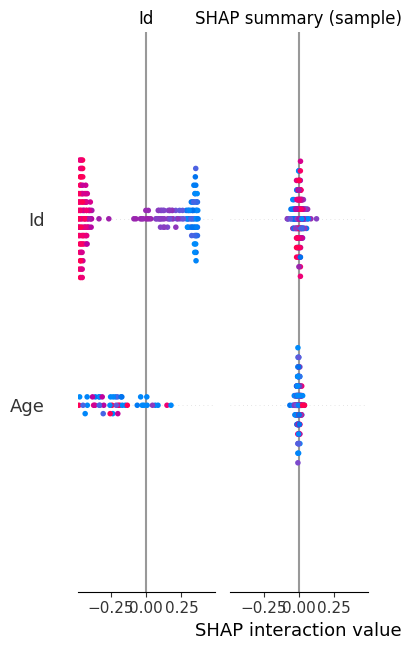

In [226]:
import shap
import matplotlib.pyplot as plt
import os

OUTPUT_DIR = "./interpret_plots"
os.makedirs(OUTPUT_DIR, exist_ok=True)
SHAP_SAMPLE = 200

# Use your actual Random Forest model variable name
rf_model = rf

# Convert scaled arrays back into DataFrames with original column names
X_train_df = pd.DataFrame(X_train, columns=X.columns)

# SHAP summary plot
sample = X_train_df.sample(n=min(SHAP_SAMPLE, len(X_train_df)), random_state=42)
explainer = shap.TreeExplainer(rf_model)
shap_values_all = explainer.shap_values(sample)

# For binary classification
if isinstance(shap_values_all, list) and len(shap_values_all) == 2:
    shap_vals = shap_values_all[1]
else:
    shap_vals = shap_values_all

plt.figure(figsize=(8, 6))
shap.summary_plot(shap_vals, sample, show=False)
plt.title("SHAP summary (sample)")
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "shap_summary_single.png"), bbox_inches='tight')
plt.show()


# **LIME**

In [227]:
# Ensure LIME is installed
!pip install lime

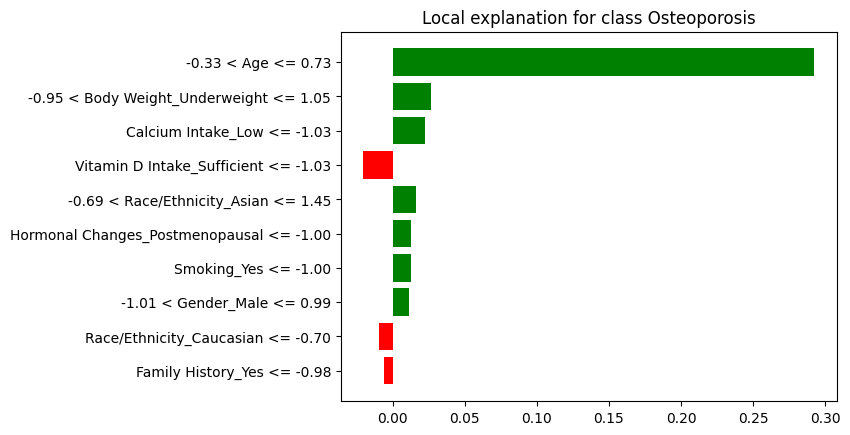

In [228]:
import lime
import matplotlib.pyplot as plt

# Assuming X_train_np, X_test_np, feature_names, class_names, and rf_model
# are available from the robust setup in cell BClaTS3e1L4J

explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_np,
    feature_names=feature_names,
    class_names=class_names,
    mode="classification"
)

i = 5
# Ensure the index 'i' is within the bounds of X_test_np
if not (0 <= i < len(X_test_np)):
    i = 0 # Default to first instance if index is out of bounds

exp = explainer.explain_instance(X_test_np[i], rf_model.predict_proba, num_features=10)
exp.as_pyplot_figure()
plt.show()
exp.show_in_notebook(show_all=False)

# **PDP + ICE**

Train/Test shapes: (1566, 13) (392, 13)
RandomForest trained.
Continuous features found: ['Age']
Binary features found: ['Gender_Male', 'Hormonal Changes_Postmenopausal', 'Family History_Yes', 'Race/Ethnicity_Asian', 'Race/Ethnicity_Caucasian', 'Body Weight_Underweight', 'Calcium Intake_Low', 'Vitamin D Intake_Sufficient', 'Physical Activity_Sedentary', 'Smoking_Yes', 'Medical Conditions_Rheumatoid Arthritis', 'Prior Fractures_Yes']

1D PDP/ICE will use feature: Age (grid_resolution=100)


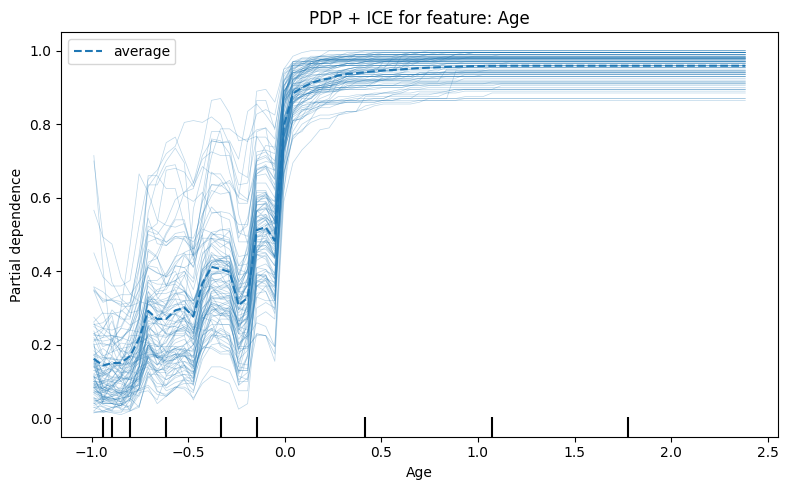


Not enough continuous features for 2D PDP. Skipping 2D PDP and plotting ICE sample curves instead.


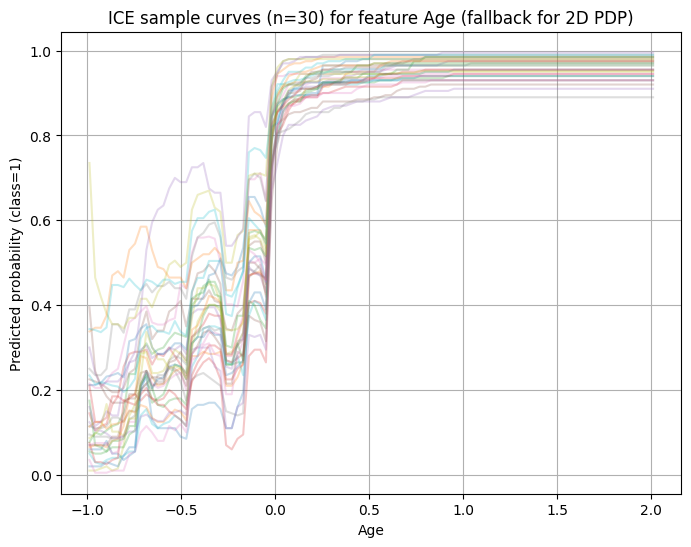

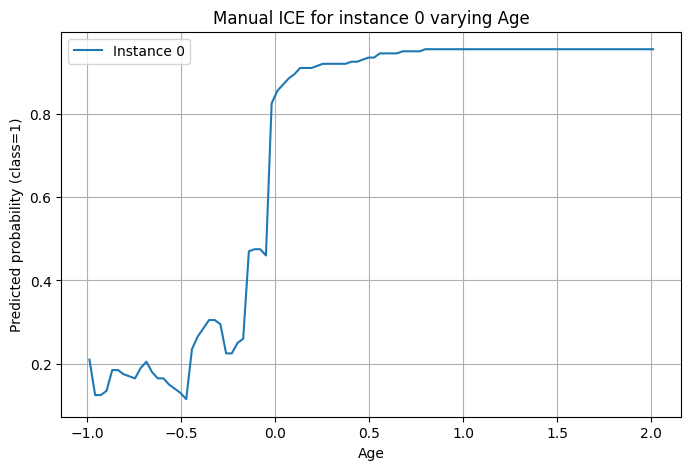

In [231]:
# Robust PDP + ICE script: handles the "not enough features for 2D PDP" case gracefully.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import PartialDependenceDisplay
import warnings
warnings.filterwarnings('ignore')

# --- 1) Load & preprocess ---
df = pd.read_csv("/content/osteoporosis.csv")

if 'Id' in df.columns:
    df = df.drop(columns=['Id'])

target_col = 'Osteoporosis'
if target_col not in df.columns:
    target_col = df.columns[-1]

X = df.drop(columns=[target_col])
y = df[target_col]

if y.dtype == object or not np.issubdtype(y.dtype, np.number):
    y = LabelEncoder().fit_transform(y)

# One-hot encode categorical features (keeps column names)
X = pd.get_dummies(X, drop_first=True)

# Standardize numeric columns
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)
print("Train/Test shapes:", X_train.shape, X_test.shape)

# --- 2) Train RandomForest ---
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
print("RandomForest trained.")

# --- 3) Feature selection for PDP/ICE ---
# continuous: heuristic > 10 unique values (after standardization these are floats but unique count still works)
continuous_feats = [c for c in X_train.columns if X_train[c].nunique() > 10]
binary_feats = [c for c in X_train.columns if set(X_train[c].unique()) <= {0,1}]

print("Continuous features found:", continuous_feats)
print("Binary features found:", binary_feats)

# Choose feature for 1D PDP/ICE (prefer continuous, else binary)
if continuous_feats:
    feat1 = continuous_feats[0]
    grid_res = 100
else:
    if len(binary_feats) == 0:
        raise RuntimeError("No suitable features found for PDP/ICE. Check your dataset columns.")
    feat1 = binary_feats[0]
    grid_res = 2

print(f"\n1D PDP/ICE will use feature: {feat1} (grid_resolution={grid_res})")

# --- 4) 1D PDP + ICE ---
fig, ax = plt.subplots(figsize=(8,5))
PartialDependenceDisplay.from_estimator(
    rf,
    X_train,
    features=[feat1],
    kind='both',
    subsample=100,
    grid_resolution=grid_res,
    random_state=42,
    response_method='predict_proba',
    target=1,
    ax=ax
)
ax.set_title(f"PDP + ICE for feature: {feat1}")
plt.tight_layout()
plt.show()

# --- 5) 2D PDP if possible, otherwise fallback to ICE sample visualization ---
# Prefer two continuous features for reliable 2D PDP
if len(continuous_feats) >= 2:
    feat2_a, feat2_b = continuous_feats[0], continuous_feats[1]
    print(f"\nCreating 2D PDP for: {feat2_a} and {feat2_b}")
    fig, ax = plt.subplots(figsize=(7,6))
    PartialDependenceDisplay.from_estimator(
        rf,
        X_train,
        features=[(feat2_a, feat2_b)],
        kind='average',
        grid_resolution=20,
        response_method='predict_proba',
        target=1,
        ax=ax
    )
    ax.set_title(f"2D PDP: {feat2_a} vs {feat2_b}")
    plt.tight_layout()
    plt.show()

else:
    # Not enough numeric features for 2D PDP — produce multiple ICE curves as a fallback
    print("\nNot enough continuous features for 2D PDP. Skipping 2D PDP and plotting ICE sample curves instead.")
    # build a grid for feat1 (binary or continuous)
    if feat1 in binary_feats:
        grid = np.array([0,1])
    else:
        lo, hi = np.percentile(X_train[feat1], [5,95])
        grid = np.linspace(lo, hi, 100)

    # Plot ICE curves for up to N instances from test set
    N = min(30, X_test.shape[0])
    sample_idx = np.random.RandomState(42).choice(range(X_test.shape[0]), size=N, replace=False)

    plt.figure(figsize=(8,6))
    for idx in sample_idx:
        inst = X_test.iloc[idx].copy()
        insts = pd.DataFrame(np.tile(inst.values, (len(grid), 1)), columns=X_test.columns)
        insts[feat1] = grid
        try:
            pv = rf.predict_proba(insts)[:,1]
        except Exception:
            pv = rf.predict(insts)
        plt.plot(grid, pv, alpha=0.25)
    plt.xlabel(feat1)
    plt.ylabel("Predicted probability (class=1)")
    plt.title(f"ICE sample curves (n={N}) for feature {feat1} (fallback for 2D PDP)")
    plt.grid(True)
    plt.show()

# --- 6) Manual ICE for a single instance (always provide this) ---
instance_idx = 0
instance = X_test.iloc[instance_idx].copy()
if feat1 in binary_feats:
    grid = np.array([0,1])
else:
    lo, hi = np.percentile(X_train[feat1], [5,95])
    grid = np.linspace(lo, hi, 100)

instances = pd.DataFrame(np.tile(instance.values, (len(grid), 1)), columns=X_test.columns)
instances[feat1] = grid
probs = rf.predict_proba(instances)[:,1]

plt.figure(figsize=(8,5))
plt.plot(grid, probs, label=f"Instance {instance_idx}")
plt.xlabel(feat1)
plt.ylabel("Predicted probability (class=1)")
plt.title(f"Manual ICE for instance {instance_idx} varying {feat1}")
plt.legend()
plt.grid(True)
plt.show()
